In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display basic information about the dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Dataset Overview
The dataset contains 200 customers with 5 columns:

CustomerID: Unique identifier for each customer.    
Gender: Categorical variable (Male/Female).        
Age: Customer’s age.          
Annual Income (k$): Customer’s yearly income in thousand dollars.           
Spending Score (1-100): A metric (1-100) showing how much they spend.      
No missing values were found.

We will perform K-Means Clustering using the Annual Income (k$) and Spending Score (1-100), as these are typically good indicators for segmentation.

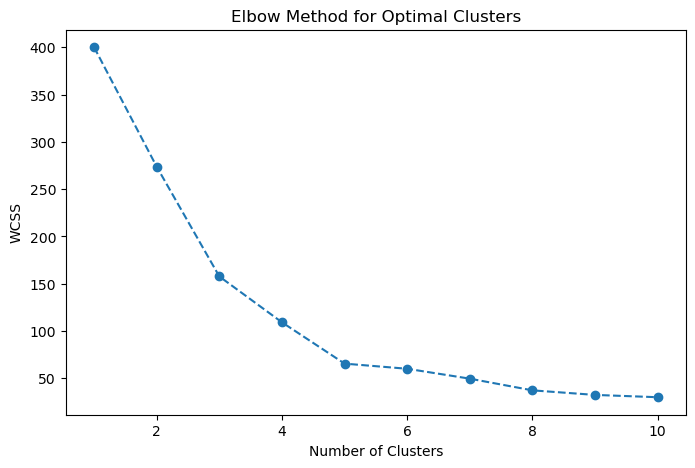

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")



# Selecting relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


##### The Elbow Method plot shows the optimal number of clusters where the WCSS (Within-Cluster Sum of Squares) decreases significantly before flattening out. Based on the curve, the optimal cluster count appears to be 5.

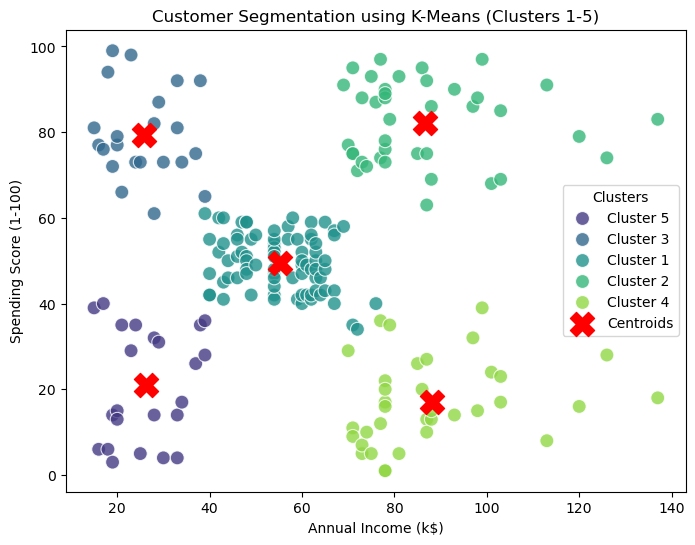

In [20]:
# Apply K-Means clustering with 5 clusters
df['Cluster'] = df['Cluster'] + 1

# Update cluster labels for visualization
cluster_labels = {
    1: "Cluster 1",
    2: "Cluster 2",
    3: "Cluster 3",
    4: "Cluster 4",
    5: "Cluster 5"
}

# Visualizing the clusters with updated labels
plt.figure(figsize=(8,6))
scatter = sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                          hue=df['Cluster'].map(cluster_labels), palette='viridis', s=100, alpha=0.8)

# Adding centroids
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means (Clusters 1-5)')
plt.legend(title="Clusters")
plt.show()



In [32]:
#### The scatter plot visualizes the customer segmentation based on Annual Income and Spending Score, with 5 clusters identified by K-Means. The red "X" marks represent the cluster centroids.

Cluster Interpretation:

Cluster 1: High Income, High Spending = Likely luxury customers.   
Cluster 2: High Income, Low Spending = Potentially price-sensitive or saving-oriented customers.  
Cluster 3: Low Income, High Spending = Could be younger customers or credit-dependent buyers.  
Cluster 4: Low Income, Low Spending = Budget-conscious or less engaged customers.  
Cluster 5: Middle-range behaviors = A balanced spending group.  

SyntaxError: invalid syntax (2059214768.py, line 4)

#### Business Strategy for Each Customer Segment (Cluster)
Each cluster represents a different type of customer based on their Annual Income and Spending Score. The best business strategies depend on their spending behavior and purchasing power.



#### Strategy 

#### Cluster 1: High Income, High Spending (Luxury Customers)
Characteristics:

High annual income.  
High spending score (frequent and big spenders).  
Likely to be premium customers who enjoy luxury and exclusive offers.  
Business Strategy: ✔️ Personalized VIP Experience → Offer loyalty programs, premium memberships, and exclusive discounts.  
✔️ Luxury & Premium Products → Market high-end products and services.  
✔️ Early Access to Products → Provide early access to new collections or limited-edition items.  
✔️ Exclusive Events → Invite them to special VIP events, product launches, or personal shopping experiences.  

📌 Goal: Retain them as high-value customers and increase lifetime value.  

#### Cluster 2: Low Income, High Spending (Impulsive Buyers)  
Characteristics:

Low annual income but high spending.  
Likely young buyers or credit-dependent consumers.  
Possibly influenced by trends, promotions, and social media.  
Business Strategy: ✔️ Installment Payment Options → Offer "Buy Now, Pay Later" services or flexible payment plans.  
✔️ Frequent Discounts & Promotions → Attract them with time-limited sales, bundle deals, or loyalty rewards.  
✔️ Social Media Marketing → Use influencer marketing and viral trends to capture their attention.  
✔️ Gamification & Reward Systems → Encourage repeat purchases with point-based loyalty programs.  

📌 Goal: Encourage repeat purchases while ensuring financial sustainability.  

#### Cluster 3: High Income, Low Spending (Price-Conscious Affluent Customers)  
Characteristics:

High income but low spending.  
Likely professionals or financially cautious individuals.  
May prefer quality over quantity and value long-term benefits  
Business Strategy: ✔️ Value-Based Selling → Highlight durability, investment benefits, and product quality.  
✔️ Exclusive But Justified Pricing → Offer premium products with strong ROI (e.g., warranty, free maintenance).  
✔️ Concierge Services → Provide high-end personalized services (e.g., personal shopper, customization).  
✔️ Corporate Partnerships → Offer tailored business/corporate discounts for bulk purchases.  

📌 Goal: Convert them into long-term premium customers by emphasizing value over price.  

#### Cluster 4: Low Income, Low Spending (Budget-Conscious Customers)  
Characteristics:

Low income and low spending.  
Likely to be price-sensitive and make purchases only when necessary.  
Business Strategy: ✔️ Budget-Friendly Pricing → Offer essential products at competitive prices.  
✔️ Discounts & Savings Plans → Provide coupons, clearance sales, and loyalty savings.  
✔️ Subscription Services → Introduce budget-friendly subscriptions (e.g., affordable monthly product boxes).  
✔️ Referral Programs → Encourage customer acquisition through referral discounts.  

📌 Goal: Retain them through affordability and long-term savings incentives.

#### Cluster 5: Middle Income, Balanced Spending (Potentially Loyal Customers)
Characteristics:

Moderate income and moderate spending.  
Likely to be working professionals or middle-class families.  
May prioritize convenience, quality, and affordability equally.  
Business Strategy: ✔️ Tiered Loyalty Programs → Reward frequent purchases with discounts, cashback, or free services.  
✔️ Seasonal Campaigns → Offer promotions during key shopping seasons (holidays, back-to-school, etc.).  
✔️ Bundle Offers → Increase basket size by offering product/service bundles.  
✔️ Subscription & Membership Models → Encourage repeat purchases with membership perks.  

📌 Goal: Build brand loyalty and increase customer retention through personalized deals.

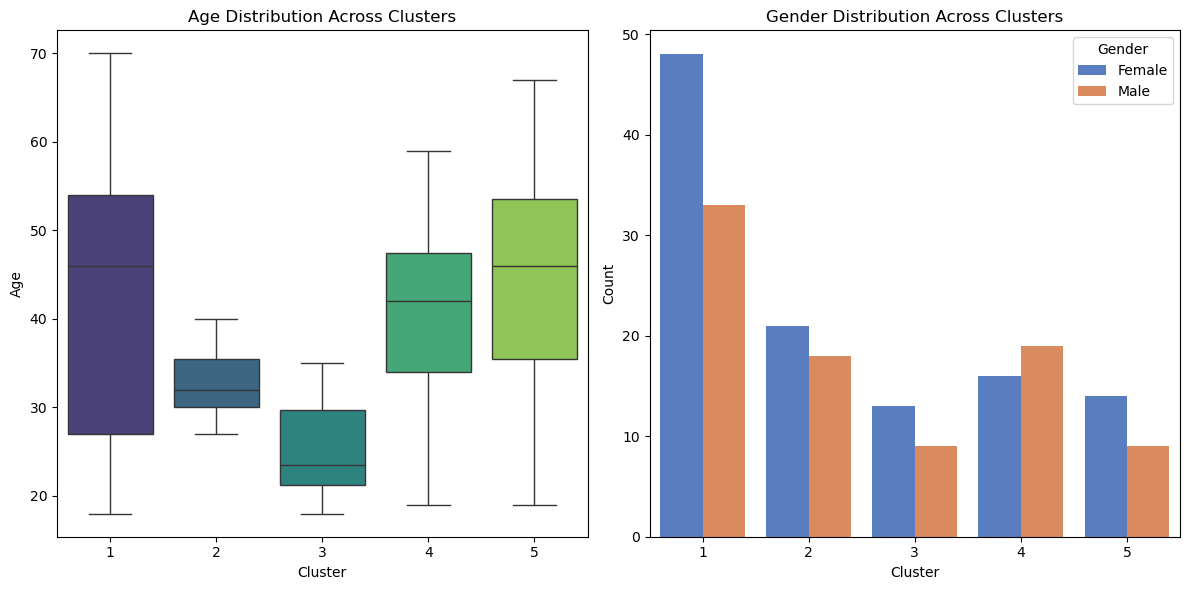

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure for multiple plots
plt.figure(figsize=(12, 6))

# Plot Age distribution across Clusters
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Cluster'], y=df['Age'], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Age Distribution Across Clusters")

# Plot Gender distribution across Clusters
plt.subplot(1, 2, 2)
sns.countplot(x=df['Cluster'], hue=df['Gender'], data=df, palette="muted")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Gender Distribution Across Clusters")
plt.legend(title="Gender")

# Show the plots
plt.tight_layout()
plt.show()


#### Age Distribution Across Clusters (Left Chart):

Cluster 3 (Young, High Spenders) has the youngest customers.  
Cluster 2 (Low-Income, Cautious Buyers) and Cluster 0 (Middle-Class, Moderate Spenders) have older customers.  
Cluster 4 (High-Income, High Spenders - Luxury Segment) is composed of mid-aged individuals.  
Gender Distribution Across Clusters (Right Chart):

Cluster 1 (Wealthy, Minimal Spenders) is mostly Male.  
Other clusters, especially Clusters 0, 2, 3, and 4, have more Female customers.

##### Cluster 3 (Young, High Spenders): Social media campaigns, influencer marketing.
##### Cluster 1 (Wealthy, Minimal Spenders - Male): High-end executive products, luxury experience selling.
##### Cluster 4 (Luxury Spenders - Female): Premium branding, personalized experiences, loyalty programs.